In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import re
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from math import factorial as f


from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from matplotlib.font_manager import FontProperties
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

from mlxtend.regressor import StackingRegressor

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data Understanding & Exploration:**


**1.a Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable**

In [4]:
TelcomCustomerChurn1=pd.read_csv('/content/drive/MyDrive/Python Course/TelcomCustomer-Churn_1.csv')

In [5]:
TelcomCustomerChurn1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customerID       7043 non-null   object
 1   gender           7043 non-null   object
 2   SeniorCitizen    7043 non-null   int64 
 3   Partner          7043 non-null   object
 4   Dependents       7043 non-null   object
 5   tenure           7043 non-null   int64 
 6   PhoneService     7043 non-null   object
 7   MultipleLines    7043 non-null   object
 8   InternetService  7043 non-null   object
 9   OnlineSecurity   7043 non-null   object
dtypes: int64(2), object(8)
memory usage: 550.4+ KB


In [6]:
TelcomCustomerChurn1.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes


**1.b Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable**

In [7]:
TelcomCustomerChurn2=pd.read_csv('/content/drive/MyDrive/Python Course/TelcomCustomer-Churn_2.csv')

In [8]:
TelcomCustomerChurn2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   OnlineBackup      7043 non-null   object 
 2   DeviceProtection  7043 non-null   object 
 3   TechSupport       7043 non-null   object 
 4   StreamingTV       7043 non-null   object 
 5   StreamingMovies   7043 non-null   object 
 6   Contract          7043 non-null   object 
 7   PaperlessBilling  7043 non-null   object 
 8   PaymentMethod     7043 non-null   object 
 9   MonthlyCharges    7043 non-null   float64
 10  TotalCharges      7043 non-null   object 
 11  Churn             7043 non-null   object 
dtypes: float64(1), object(11)
memory usage: 660.4+ KB


In [9]:
TelcomCustomerChurn2.head(10)

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


**1.c Merge both the DataFrames on key ‘customerID’ to form a single DataFrame**

In [10]:
TelecomCustomerFinal = TelcomCustomerChurn1.merge(TelcomCustomerChurn2, on='customerID', how='outer')

In [11]:
TelecomCustomerFinal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
TelecomCustomerFinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**1.d Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python**

In [13]:
original_columns = set(TelcomCustomerChurn1.columns.tolist() + TelcomCustomerChurn2.columns.tolist())
merged_columns = set(TelecomCustomerFinal.columns.tolist())

if original_columns == merged_columns:
    print("All columns from both data sets are incorporated in the merged DataFrame.")
else:
    print("Not all columns from both data frames are incorporated in the merged DataFrame.")


print(original_columns)
print(merged_columns)


All columns from both data sets are incorporated in the merged DataFrame.
{'MonthlyCharges', 'PaymentMethod', 'Contract', 'gender', 'Dependents', 'PaperlessBilling', 'customerID', 'OnlineBackup', 'PhoneService', 'InternetService', 'Churn', 'TechSupport', 'DeviceProtection', 'TotalCharges', 'tenure', 'Partner', 'MultipleLines', 'OnlineSecurity', 'StreamingMovies', 'StreamingTV', 'SeniorCitizen'}
{'MonthlyCharges', 'PaymentMethod', 'Contract', 'gender', 'Dependents', 'PaperlessBilling', 'customerID', 'OnlineBackup', 'PhoneService', 'InternetService', 'Churn', 'TechSupport', 'DeviceProtection', 'TotalCharges', 'tenure', 'Partner', 'MultipleLines', 'OnlineSecurity', 'StreamingMovies', 'StreamingTV', 'SeniorCitizen'}


# **Data Cleaning & Analysis:**

**2.a Impute missing/unexpected values in the DataFrame**

In [14]:
def check_missing_values(TelecomCustomerFinal):
   print("percentage of missing data of dataframe \n",TelecomCustomerFinal.isnull().sum()/len(TelecomCustomerFinal)*100)

check_missing_values(TelecomCustomerFinal)

percentage of missing data of dataframe 
 customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64


In [15]:
def check_duplicate(TelecomCustomerFinal):
    duplicate=TelecomCustomerFinal[TelecomCustomerFinal.duplicated()]
    return duplicate

duplicate=check_duplicate(TelecomCustomerFinal)
duplicate

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


There are no duplicate records in data set

In [16]:
for column in TelecomCustomerFinal.columns:
    value_counts = TelecomCustomerFinal[column].value_counts()
    print(f'Value counts for {column}:\n{value_counts}\n')
    print('*'*50)

Value counts for customerID:
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64

**************************************************
Value counts for gender:
Male      3555
Female    3488
Name: gender, dtype: int64

**************************************************
Value counts for SeniorCitizen:
0    5901
1    1142
Name: SeniorCitizen, dtype: int64

**************************************************
Value counts for Partner:
No     3641
Yes    3402
Name: Partner, dtype: int64

**************************************************
Value counts for Dependents:
No     4933
Yes    2110
Name: Dependents, dtype: int64

**************************************************
Value counts for tenure:
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73,

There are 11 missing values for "TotalCharges" These observations have also a tenure of 0, even though MontlyCharges is not null for these entries. This information appeared to be contradictory, and therefore, we decide to remove those observations from the data set.

**2.b Make sure all the variables with continuous values are of ‘Float’ type [For Example: MonthlyCharges, TotalCharges]**

In [17]:

# Dropping empty entried in 'TotalCharges' column
TelecomCustomerFinal = TelecomCustomerFinal.drop(TelecomCustomerFinal[TelecomCustomerFinal['TotalCharges'].eq(" ") == True].index)

# Converting the column to float datatype.
TelecomCustomerFinal["TotalCharges"].astype(float)
TelecomCustomerFinal["TotalCharges"] = pd.to_numeric(TelecomCustomerFinal["TotalCharges"])
TelecomCustomerFinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


MonthlyCharges datatype is float so no need for conversion, only TotalCharges required data type conversion to float

The customerID column is not needed to explain whether or not the customer will churn. Therefore, we drop this column from the data set.

In [18]:
TelecomCustomerFinal.drop(columns='customerID', inplace=True)


**2.c Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. Clearly show percentage distribution in the pie-chart**

Lets convert the columns with an 'object' datatype into categorical variables

In [19]:
categorical_columns = [col for col in TelecomCustomerFinal.columns if col != 'customerID' and TelecomCustomerFinal[col].dtype == 'object']
TelecomCustomerFinal[categorical_columns] = TelecomCustomerFinal[categorical_columns].astype('category')
print(TelecomCustomerFinal.dtypes)
TelecomCustomerFinal.info()

gender              category
SeniorCitizen          int64
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7032 non-null   category
 1   SeniorCitizen     7032 non-null   int64   
 2   Partner           7032 non-null   category
 3   Dependents        7032 non-null   category
 4   tenure

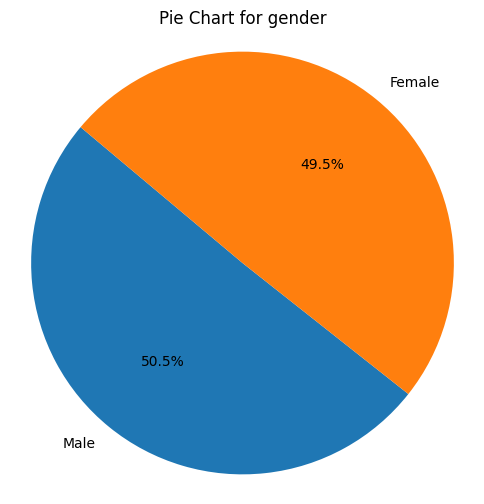

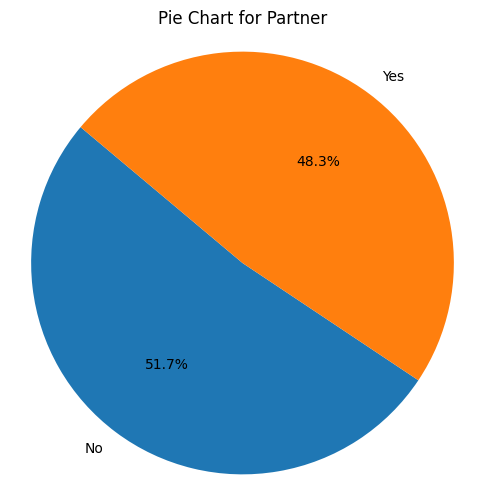

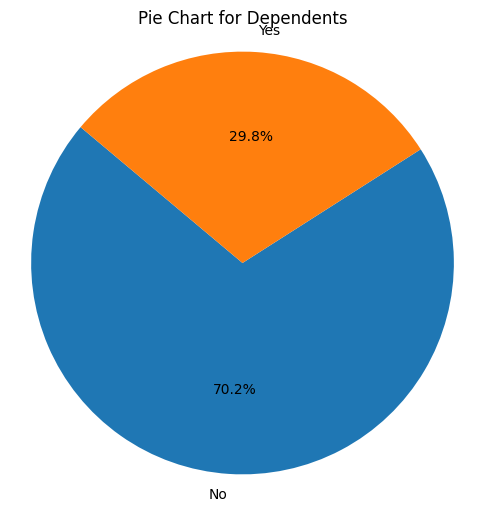

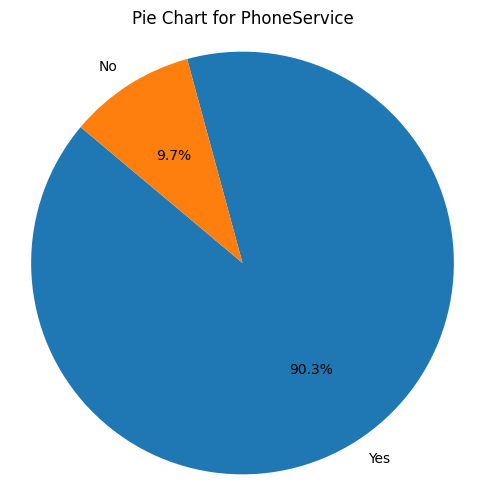

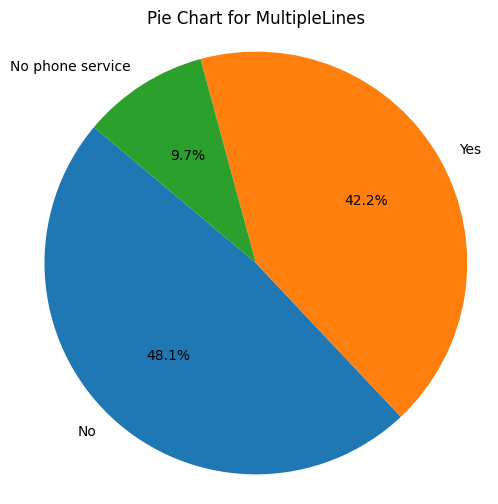

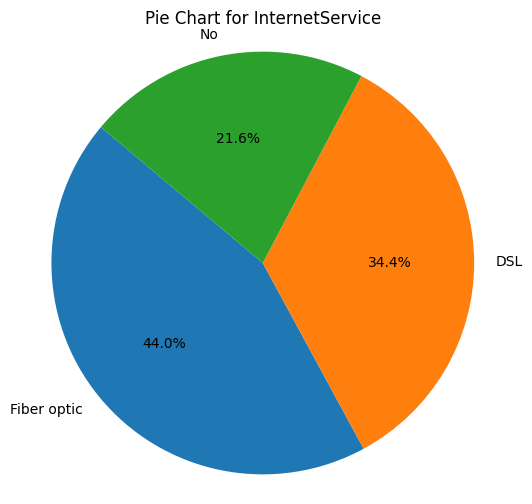

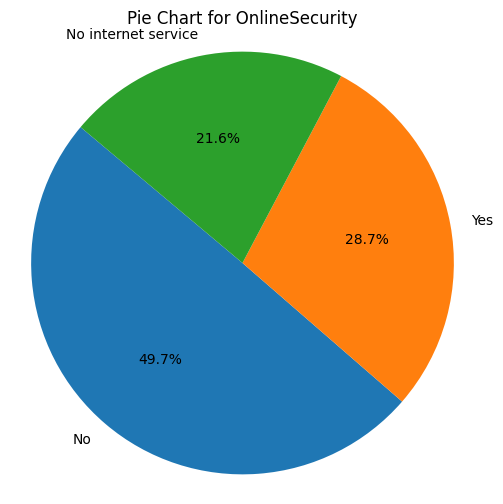

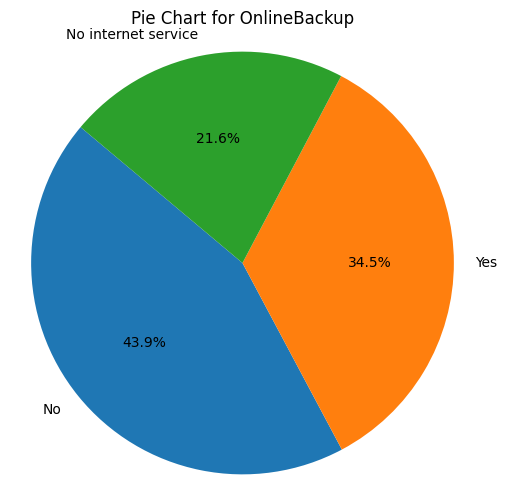

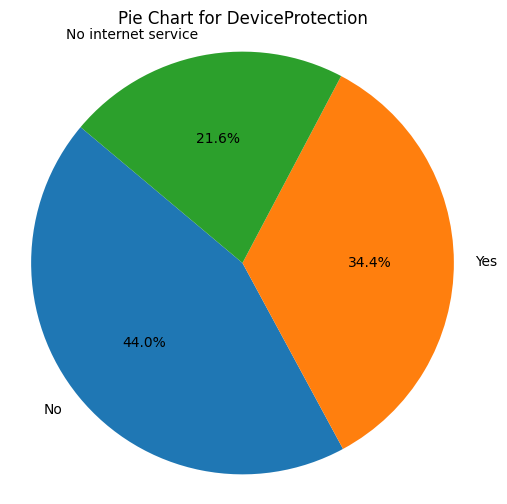

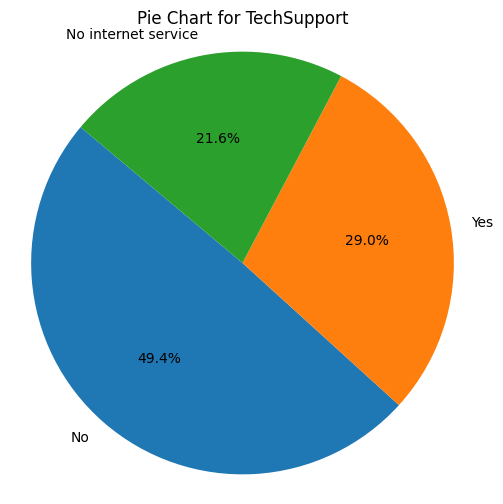

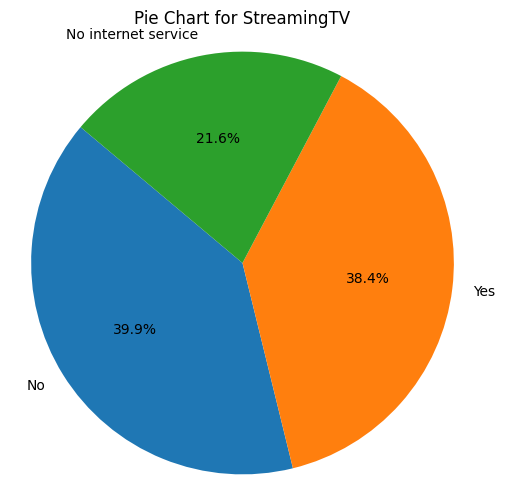

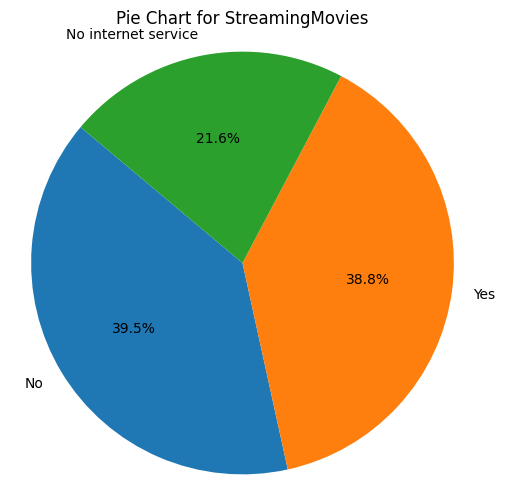

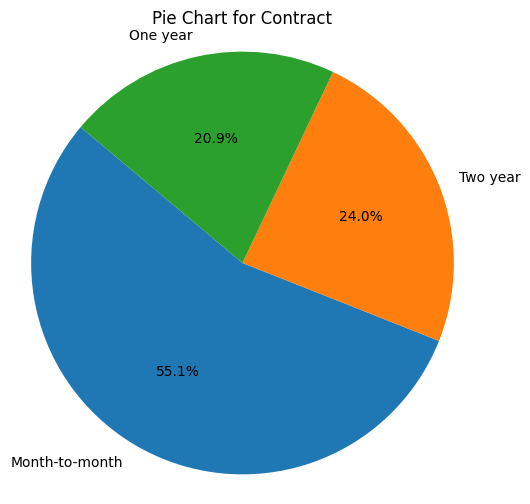

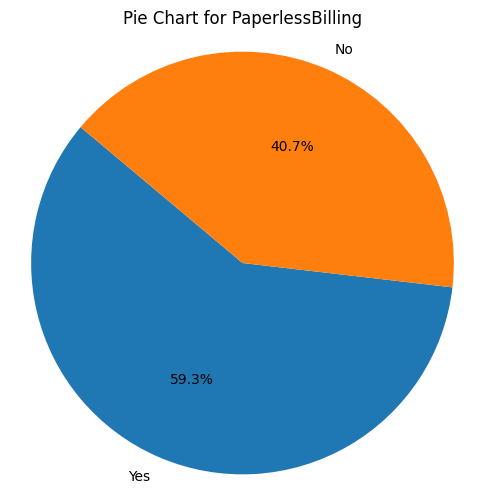

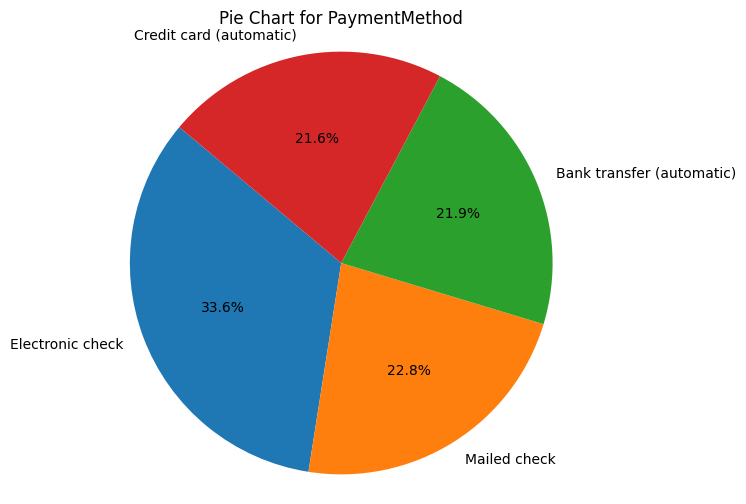

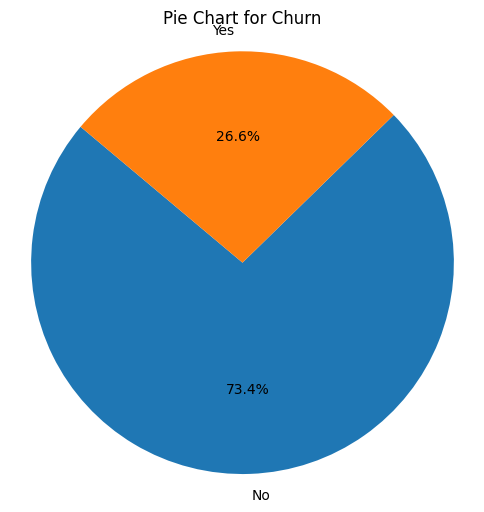

In [20]:
def create_pie_charts_for_categorical_features(df):

    categorical_columns = df.select_dtypes(include=['category']).columns


    for column in categorical_columns:

        value_counts = df[column].value_counts()
        labels = value_counts.index
        sizes = value_counts.values
        plt.figure(figsize=(6, 6))
        plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
        plt.axis('equal')
        plt.title(f'Pie Chart for {column}')
        plt.show()


create_pie_charts_for_categorical_features(TelecomCustomerFinal)

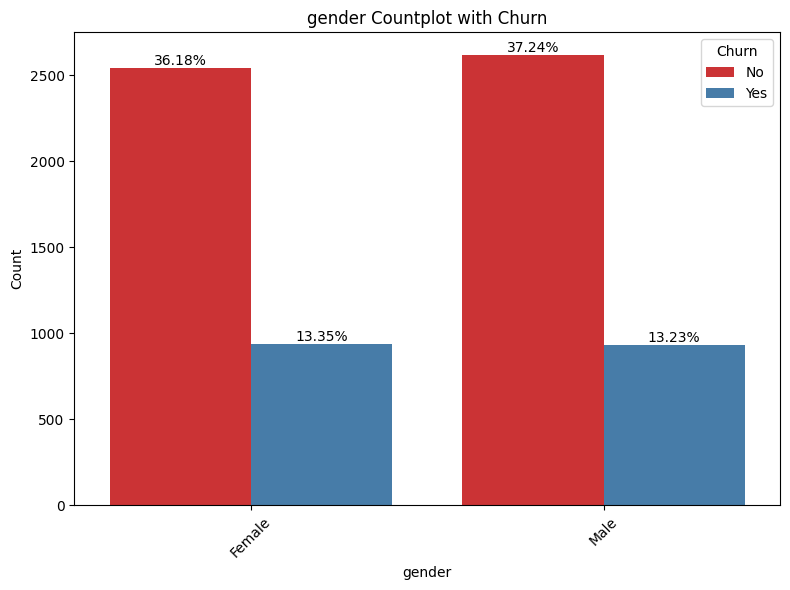

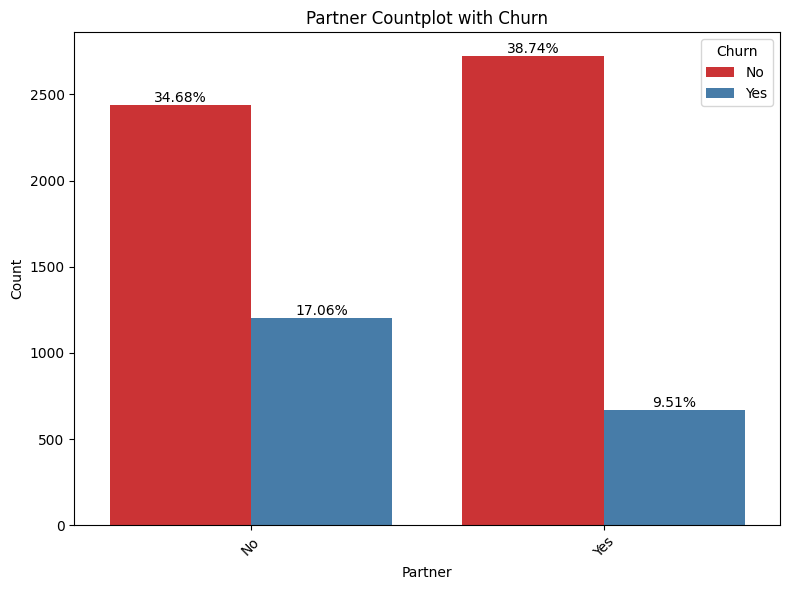

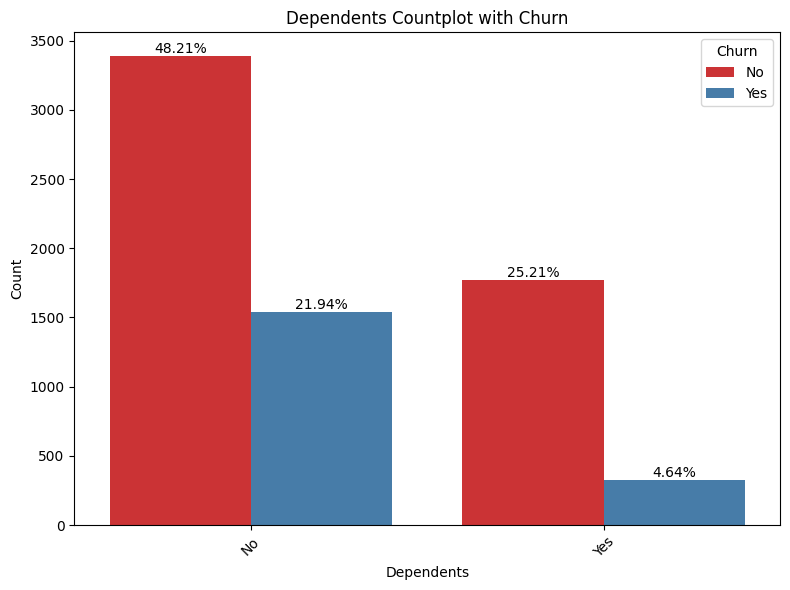

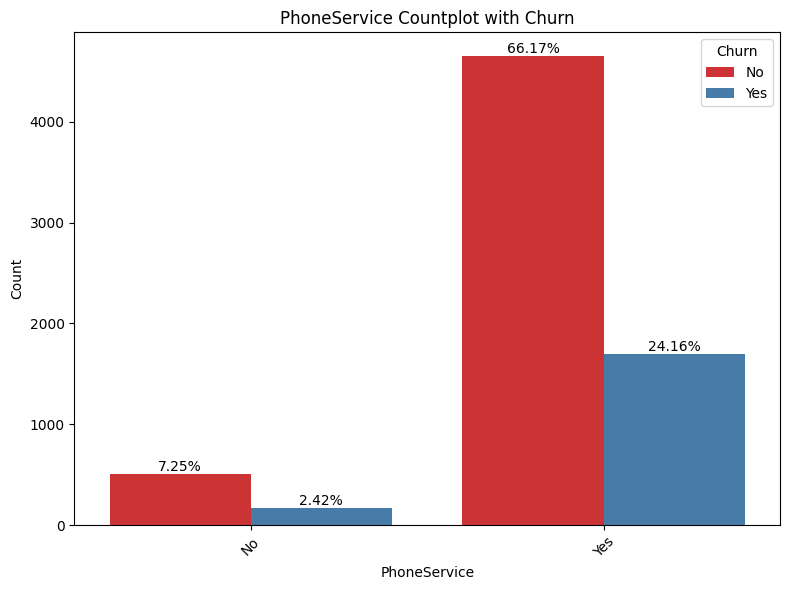

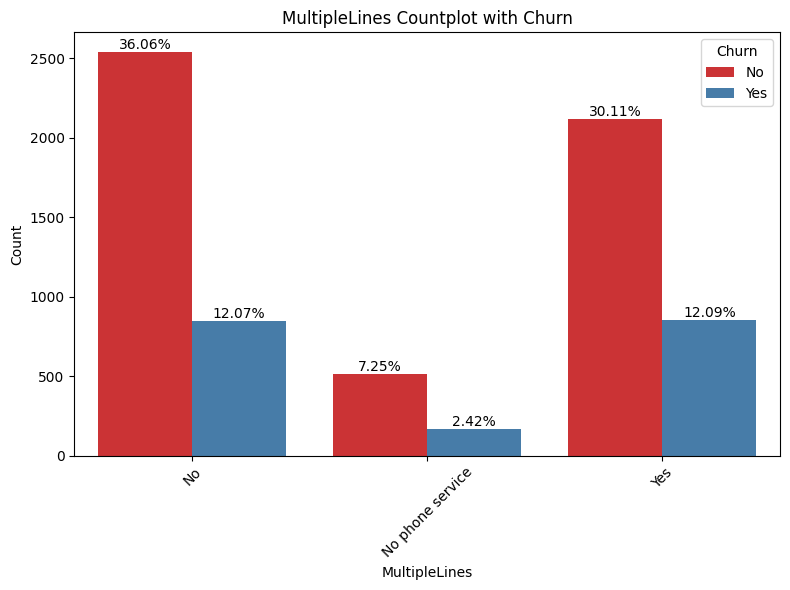

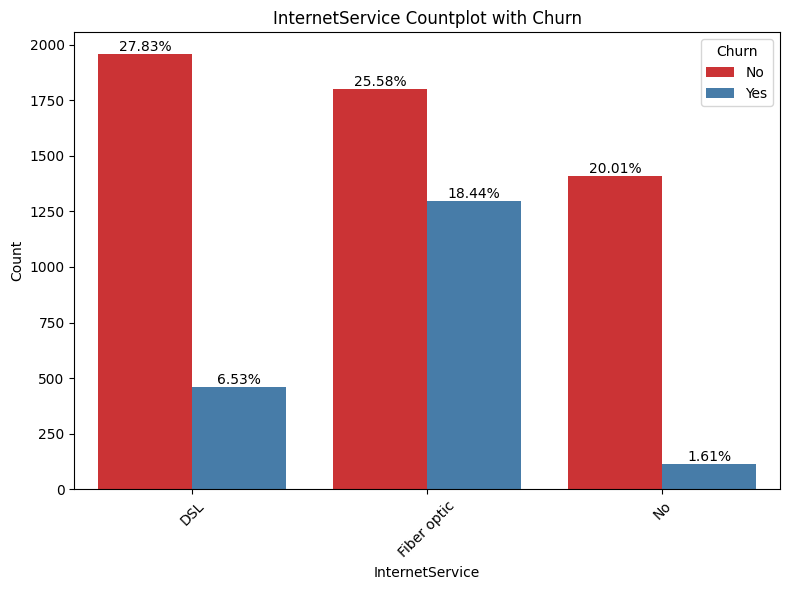

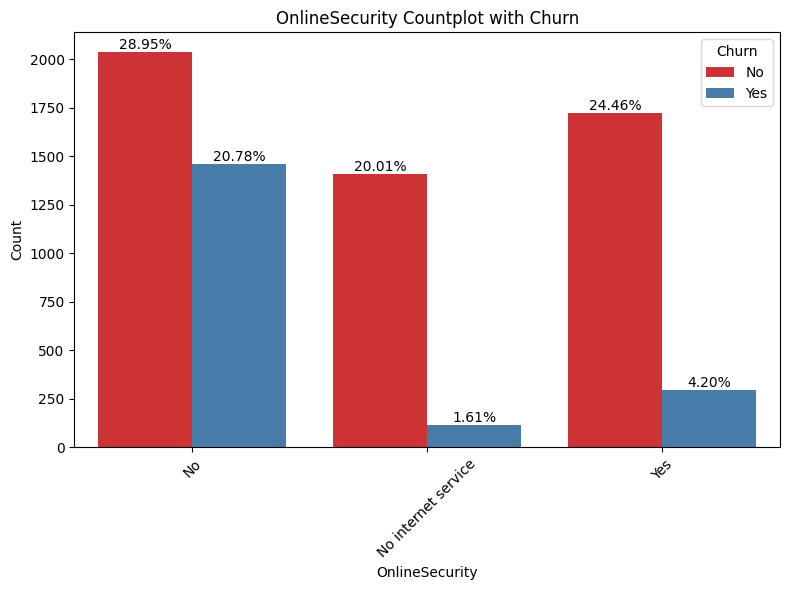

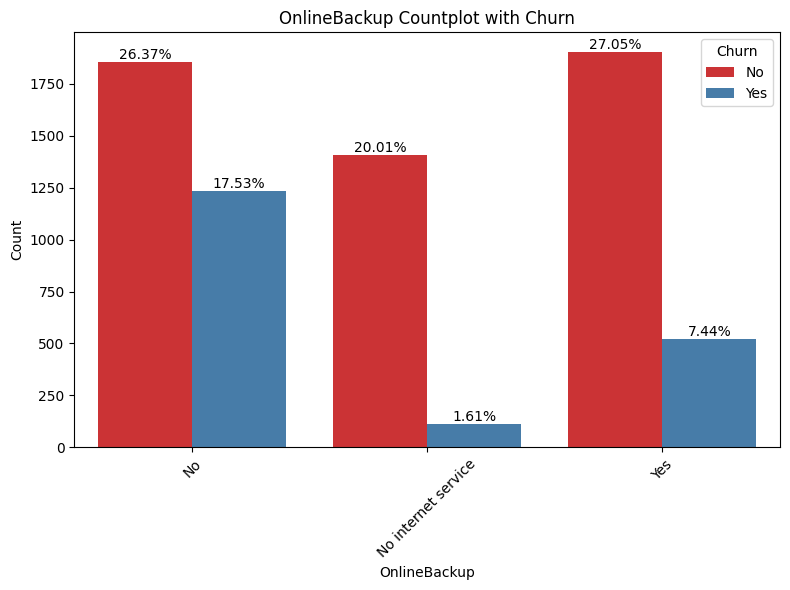

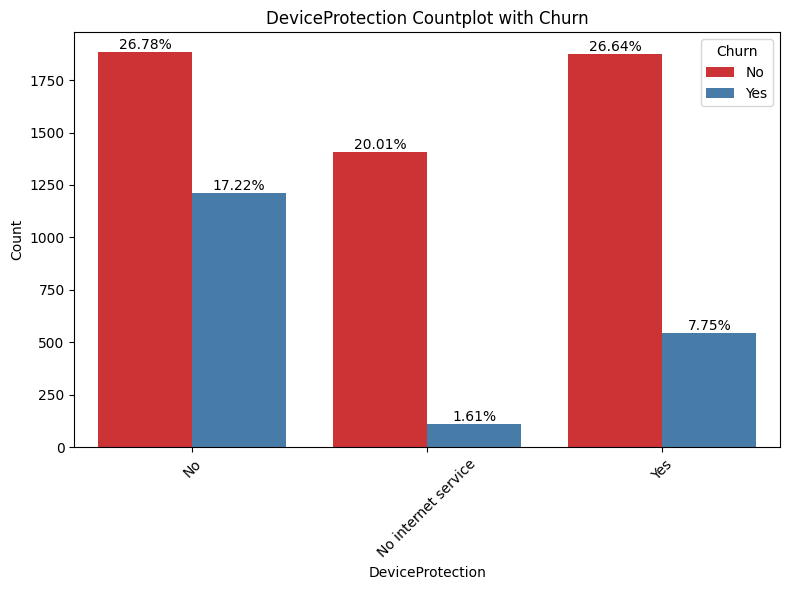

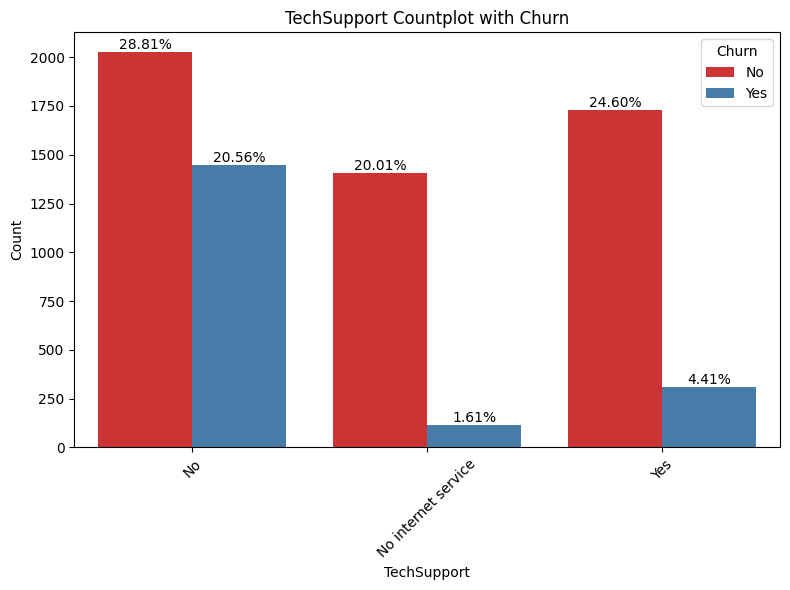

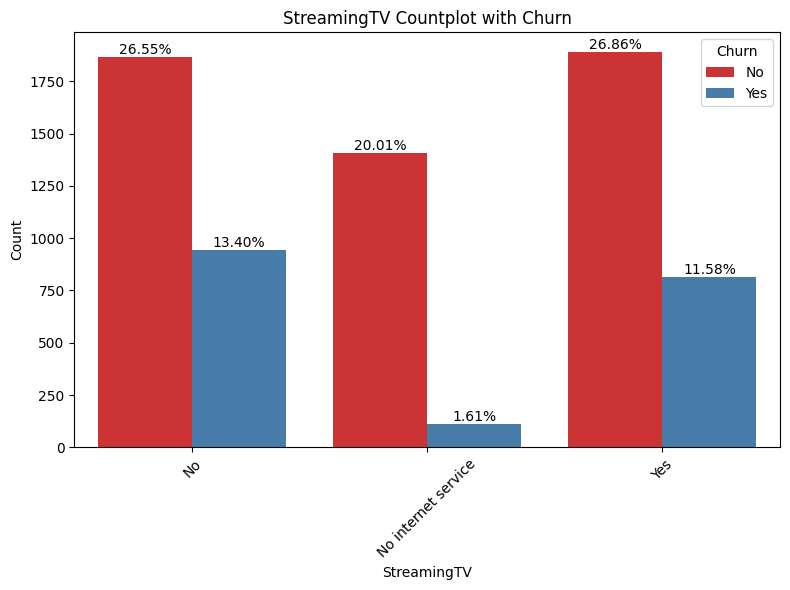

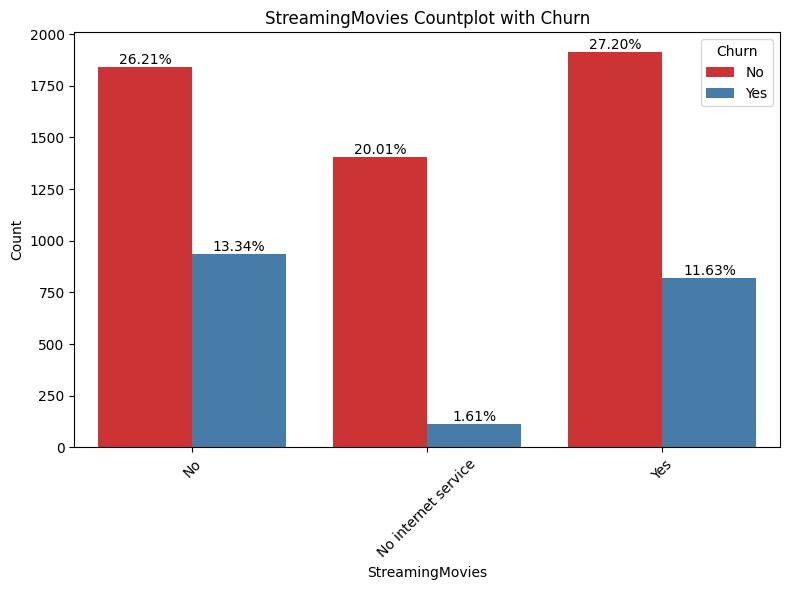

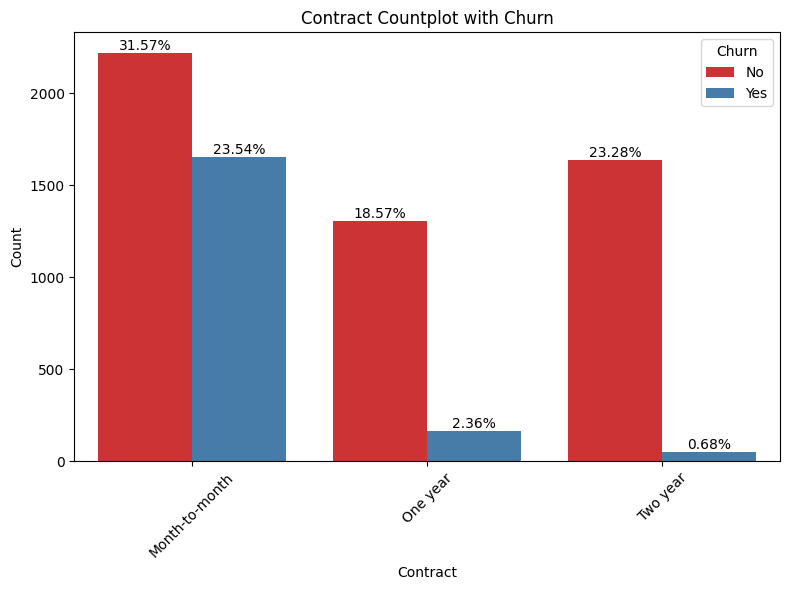

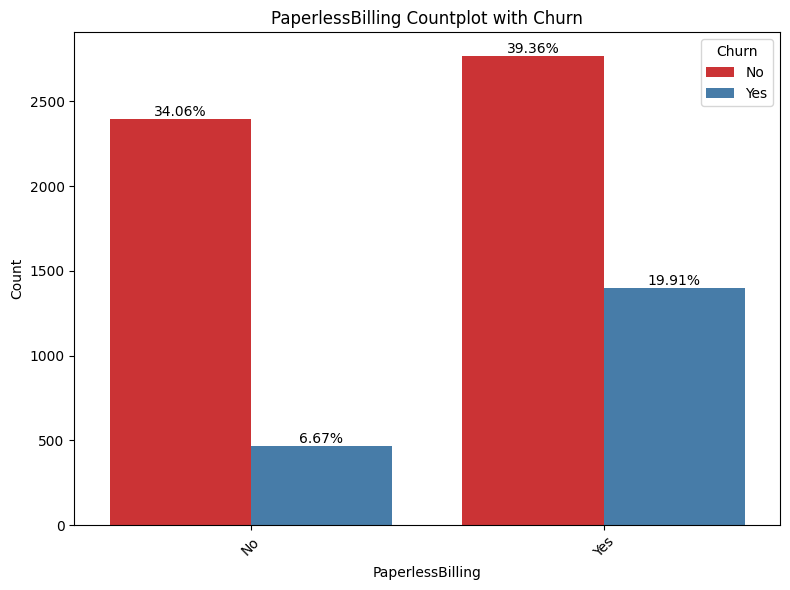

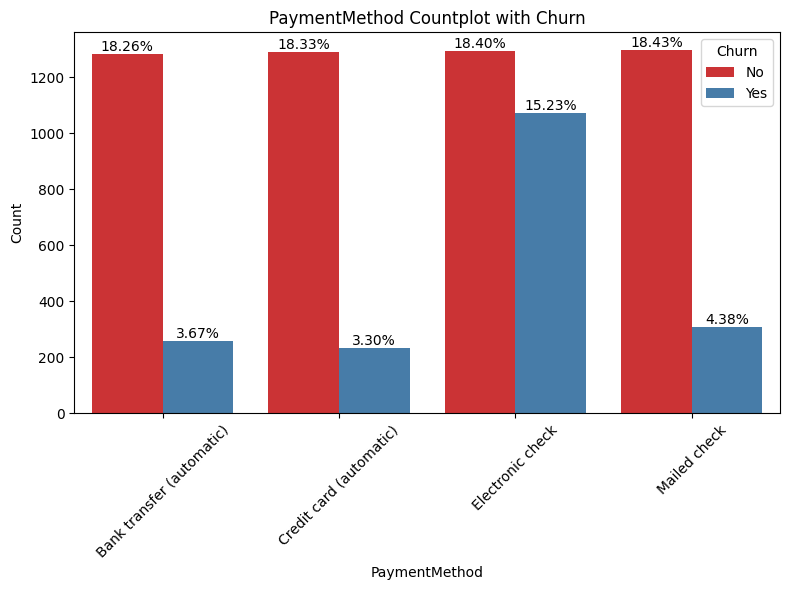

In [21]:
def generate_categorical_countplots(dataframe, churn_column='Churn'):

    categorical_columns = dataframe.select_dtypes(include=['category']).columns.tolist()
    categorical_columns.remove(churn_column)


    for categorical_column in categorical_columns:
        plt.figure(figsize=(8, 6))
        plt.title(f'{categorical_column} Countplot with Churn')


        ax = sns.countplot(data=dataframe, x=categorical_column, hue=churn_column, palette="Set1")


        total_height = len(dataframe)
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height/total_height*100:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

        plt.xticks(rotation=45)
        plt.xlabel(categorical_column)
        plt.ylabel("Count")
        plt.legend(title="Churn")
        plt.tight_layout()
        plt.show()
generate_categorical_countplots(TelecomCustomerFinal)

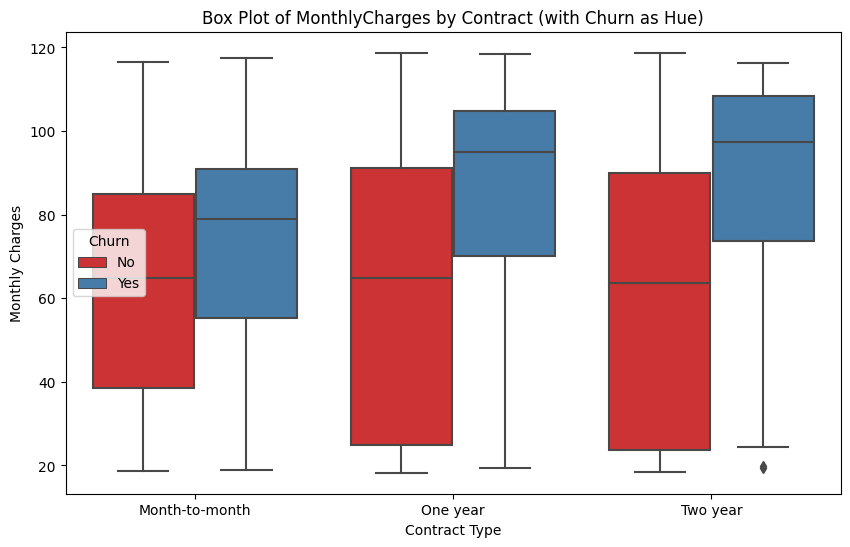

In [22]:

df = pd.DataFrame(TelecomCustomerFinal)


plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Contract', y='MonthlyCharges', hue='Churn', palette='Set1')
plt.title('Box Plot of MonthlyCharges by Contract (with Churn as Hue)')
plt.xlabel('Contract Type')
plt.ylabel('Monthly Charges')
plt.legend(title="Churn")
plt.show()

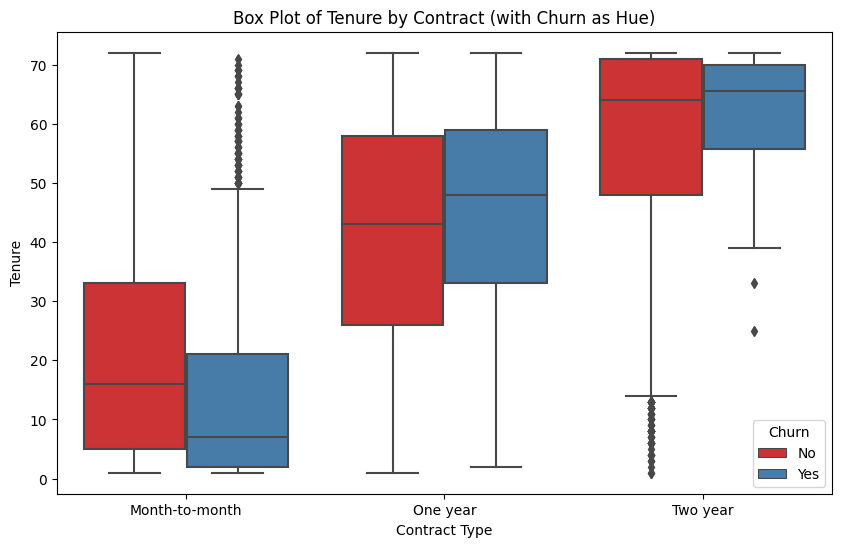

In [23]:
df = pd.DataFrame(TelecomCustomerFinal)


plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Contract', y='tenure', hue='Churn', palette='Set1')
plt.title('Box Plot of Tenure by Contract (with Churn as Hue)')
plt.xlabel('Contract Type')
plt.ylabel('Tenure')
plt.legend(title="Churn")
plt.show()

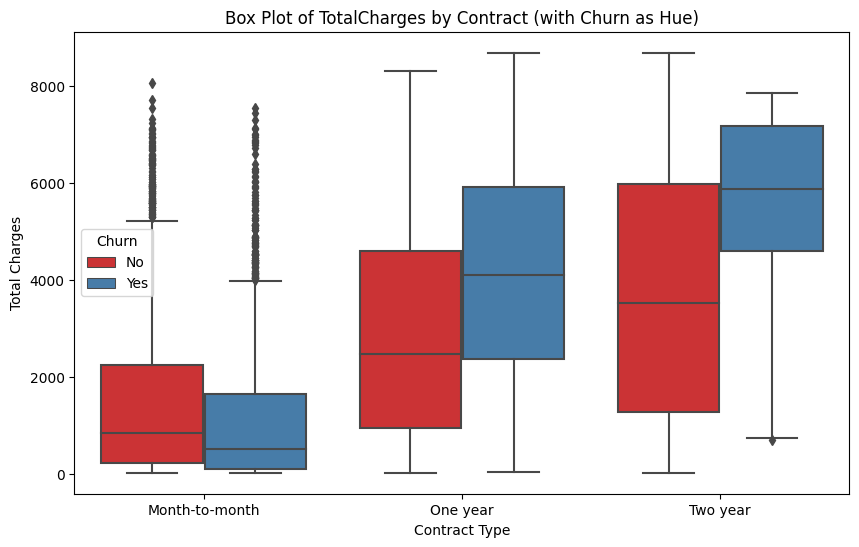

In [24]:
f = pd.DataFrame(TelecomCustomerFinal)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Contract', y='TotalCharges', hue='Churn', palette='Set1')
plt.title('Box Plot of TotalCharges by Contract (with Churn as Hue)')
plt.xlabel('Contract Type')
plt.ylabel('Total Charges')
plt.legend(title="Churn")
plt.show()

**2.d Share insights for Q2.c**

From data set its clear that churn rate is 26.6%


1. Customers who have subscribed to online security services exhibit lower churn rates compared to those who do not have this protection.

2. Churn rates are higher among customers who do not have access to tech support services, emphasizing the importance of tech support in retaining customers.

3. Clients on month-to-month contracts are more likely to experience churn, whereas those on annual contracts exhibit lower churn rates, underscoring the stability and loyalty associated with longer-term commitments.

4. There is a notable trend of higher churn rates among customers with elevated monthly charges, suggesting a correlation between higher monthly costs and increased likelihood of churn.

5. Customers with higher total charges demonstrate a stronger tendency to remain with the company, indicating a positive correlation between total charges and customer retention.

6. Customers who have chosen electronic check as their payment method are at a higher risk of churning

7. Customers subscribed to paperless billing churn more than those who are not subscribed.

8. Gender is not expected to be a significant predictor of churn, as the churn percentages remain relatively consistent for both male and female customers.

9. Customers who have a partner are more likely to stay with the company, resulting in lower churn rates compared to those without a partner.

10. Senior citizens exhibit a churn rate nearly twice as high as that of their younger counterparts, underscoring a notable disparity in customer retention between these age groups.


**2e. Encode all the appropriate Categorical features with the best suitable approach**

In [25]:
df_telco_transformed = TelecomCustomerFinal.copy()


replaceStruct = {
                "gender":{"Male": 0, "Female": 1},
                "Partner":{"No": 0, "Yes": 1},
                "Dependents":{"No": 0, "Yes": 1},
                "PhoneService":{"No": 0, "Yes": 1},
                "MultipleLines":{"No phone service":-1, "No": 0, "Yes": 1},
                "OnlineSecurity":{"No internet service":-1, "No": 0, "Yes": 1},
                "OnlineBackup":{"No internet service":-1, "No": 0, "Yes": 1},
                "DeviceProtection":{"No internet service":-1, "No": 0, "Yes": 1},
                "TechSupport":{"No internet service":-1, "No": 0, "Yes": 1},
                "StreamingTV":{"No internet service":-1, "No": 0, "Yes": 1},
                "StreamingMovies":{"No internet service":-1, "No": 0, "Yes": 1},
                "PaperlessBilling":{"No": 0, "Yes": 1},
                "Churn":{"No": 0, "Yes": 1},}

# Columns for one hot encoding
oneHotCols = ["InternetService","Contract","PaymentMethod"]

In [26]:
# Replacing the column values with the dictioanry structure created
df_telco_transformed=df_telco_transformed.replace(replaceStruct)
df_telco_transformed=pd.get_dummies(df_telco_transformed, columns=oneHotCols)
df_telco_transformed.head(10)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,-1,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,-1,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
5,1,0,0,0,8,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
6,0,0,0,1,22,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
7,1,0,0,0,10,0,-1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
8,1,0,1,0,28,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
9,0,0,0,1,62,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0


In [46]:
df_telco_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   gender                                   7032 non-null   category
 1   SeniorCitizen                            7032 non-null   int64   
 2   Partner                                  7032 non-null   category
 3   Dependents                               7032 non-null   category
 4   tenure                                   7032 non-null   float64 
 5   PhoneService                             7032 non-null   category
 6   MultipleLines                            7032 non-null   category
 7   OnlineSecurity                           7032 non-null   category
 8   OnlineBackup                             7032 non-null   category
 9   DeviceProtection                         7032 non-null   category
 10  TechSupport                         

**2.g Normalize/Standardize the data with the best suitable approach**

In [52]:
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the scaler on the selected numeric features
df_telco_transformed[numeric_features] = scaler.fit_transform(df_telco_transformed[numeric_features])
df_telco_transformed.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,-1,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,-1,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [53]:
selected_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_selected = df_telco_transformed[selected_columns]
print(df_selected)

        tenure  MonthlyCharges  TotalCharges
0     0.000000        0.115423      0.001275
1     0.464789        0.385075      0.215867
2     0.014085        0.354229      0.010310
3     0.619718        0.239303      0.210241
4     0.014085        0.521891      0.015330
...        ...             ...           ...
7038  0.323944        0.662189      0.227521
7039  1.000000        0.845274      0.847461
7040  0.140845        0.112935      0.037809
7041  0.042254        0.558706      0.033210
7042  0.915493        0.869652      0.787641

[7032 rows x 3 columns]


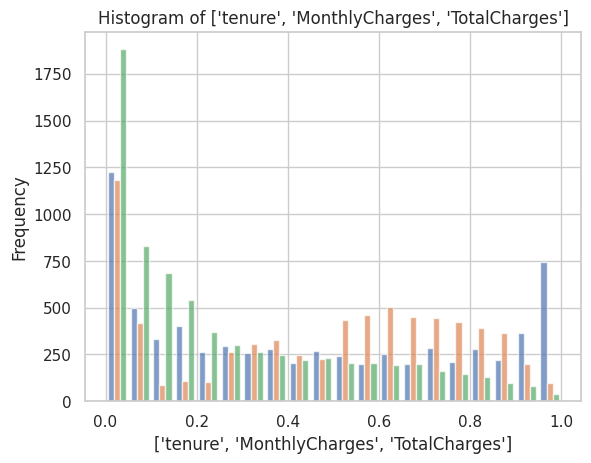

In [50]:
feature_to_plot = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Create a histogram plot
plt.hist(df_telco_transformed[feature_to_plot], bins=20, alpha=0.7)
plt.xlabel(feature_to_plot)
plt.ylabel('Frequency')
plt.title(f'Histogram of {feature_to_plot}')
plt.grid(True)
plt.show()

**2 f.Split the data into 80% train and 20% test**

In [54]:

X = df_telco_transformed.drop(columns='Churn')

# select dependent variables
y = df_telco_transformed['Churn']

# prove that the variables were selected correctly
print(X.columns)

# prove that the variables were selected correctly
print(y.name)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')
Churn


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10, stratify=y)

# **Model building and performance improvement**

**3.a Train a model using Decision tree and check the performance of the model on train and test data**

In [122]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion="gini", random_state=10)

# Train the Decision Tree model on the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [123]:
# Predict on the training data
y_train_pred = clf.predict(X_train)

# Predict on the testing data
y_test_pred = clf.predict(X_test)

# Evaluate the model's performance on the training data
train_accuracy = accuracy_score(y_train, y_train_pred)

# Evaluate the model's performance on the testing data
test_accuracy = accuracy_score(y_test, y_test_pred)

# Generate a classification report for the testing data
classification_rep = classification_report(y_test, y_test_pred)

print(f"Training Accuracy (Gini): {train_accuracy:.2f}")
print(f"Testing Accuracy (Gini): {test_accuracy:.2f}")
print("Classification Report for Testing Data (Gini):\n", classification_rep)

Training Accuracy (Gini): 1.00
Testing Accuracy (Gini): 0.74
Classification Report for Testing Data (Gini):
               precision    recall  f1-score   support

           0       0.83      0.82      0.82      1033
           1       0.51      0.52      0.51       374

    accuracy                           0.74      1407
   macro avg       0.67      0.67      0.67      1407
weighted avg       0.74      0.74      0.74      1407



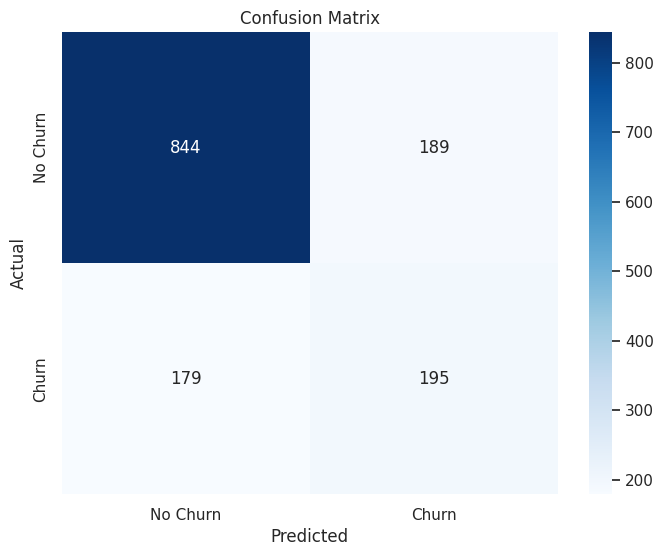

In [124]:
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

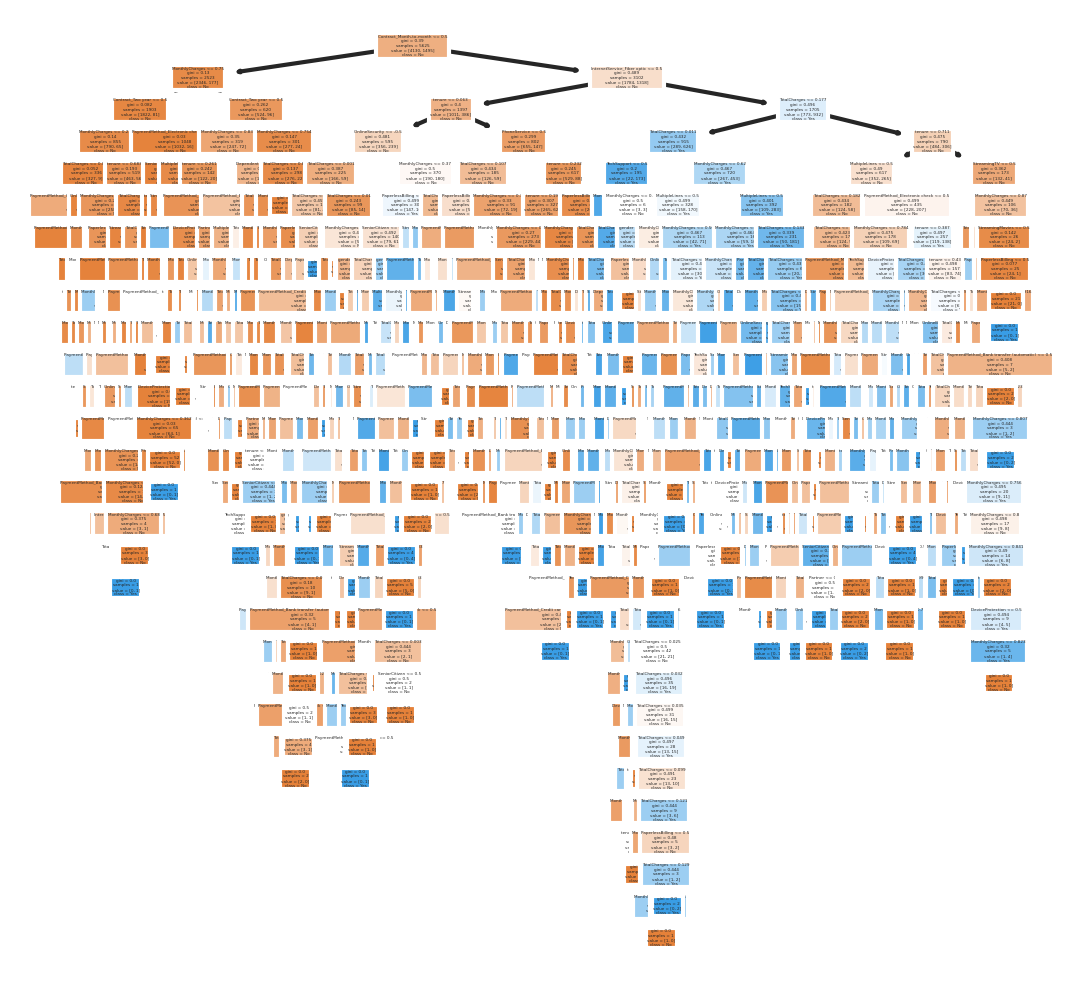

In [72]:


import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fn = list(X_train)
cn = ['No', 'Yes']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(dTree, feature_names = fn, class_names=cn, filled = True)

fig.savefig('tree.png')

1. training accuracy of 100% and testing accuracy of 74%, it indicates overfitting.

2. The testing accuracy is 74%, which is lower than the training accuracy. This indicates that the model's performance on unseen data (testing data) is not as good as its performance on the training data.


3. For class 0 (No Churn), the precision is 0.83, which means that 83% of the predicted No Churn cases are correct, while the recall is 0.82, indicating that 82% of the actual No Churn cases are correctly predicted.

4. For class 1 (Churn), the precision is 0.51, meaning that 51% of the predicted Churn cases are correct, while the recall is 0.52, indicating that 52% of the actual Churn cases are correctly predicted.

5. The F1-score for class 0 is 0.82, indicating a good balance between precision and recall for No Churn cases.

6. The F1-score for class 1 is 0.51, suggesting a lower balance between precision and recall for Churn cases.


**Conclusions:**

Decision Tree model with the Gini impurity criterion is performing well in terms of training accuracy but has room for improvement in terms of testing accuracy. The model is better at predicting the No Churn class (class 0) than the Churn class (class 1), as indicated by the differences in precision, recall, and F1-score between the two classes.

**Reducing over fitting (Regularization)**

In [125]:
clfR = DecisionTreeClassifier(criterion = 'gini', max_depth=4, random_state=1)

# Train the Decision Tree model on the training data
clfR.fit(X_train, y_train)

# Predict on the training data
y_train_pred = clfR.predict(X_train)

# Predict on the testing data
y_test_pred = clfR.predict(X_test)

# Evaluate the model's performance on the training data
train_accuracy = accuracy_score(y_train, y_train_pred)

# Evaluate the model's performance on the testing data
test_accuracy = accuracy_score(y_test, y_test_pred)

# Generate a classification report for the testing data
classification_rep = classification_report(y_test, y_test_pred)

print(f"Training Accuracy (Regularized with max_depth): {train_accuracy:}")
print(f"Testing Accuracy (Regularized with max_depth): {test_accuracy:}")
print("Classification Report for Testing Data (Regularized with max_depth):\n", classification_rep)

Training Accuracy (Regularized with max_depth): 0.7943111111111111
Testing Accuracy (Regularized with max_depth): 0.7782515991471215
Classification Report for Testing Data (Regularized with max_depth):
               precision    recall  f1-score   support

           0       0.80      0.93      0.86      1033
           1       0.64      0.37      0.47       374

    accuracy                           0.78      1407
   macro avg       0.72      0.65      0.66      1407
weighted avg       0.76      0.78      0.76      1407



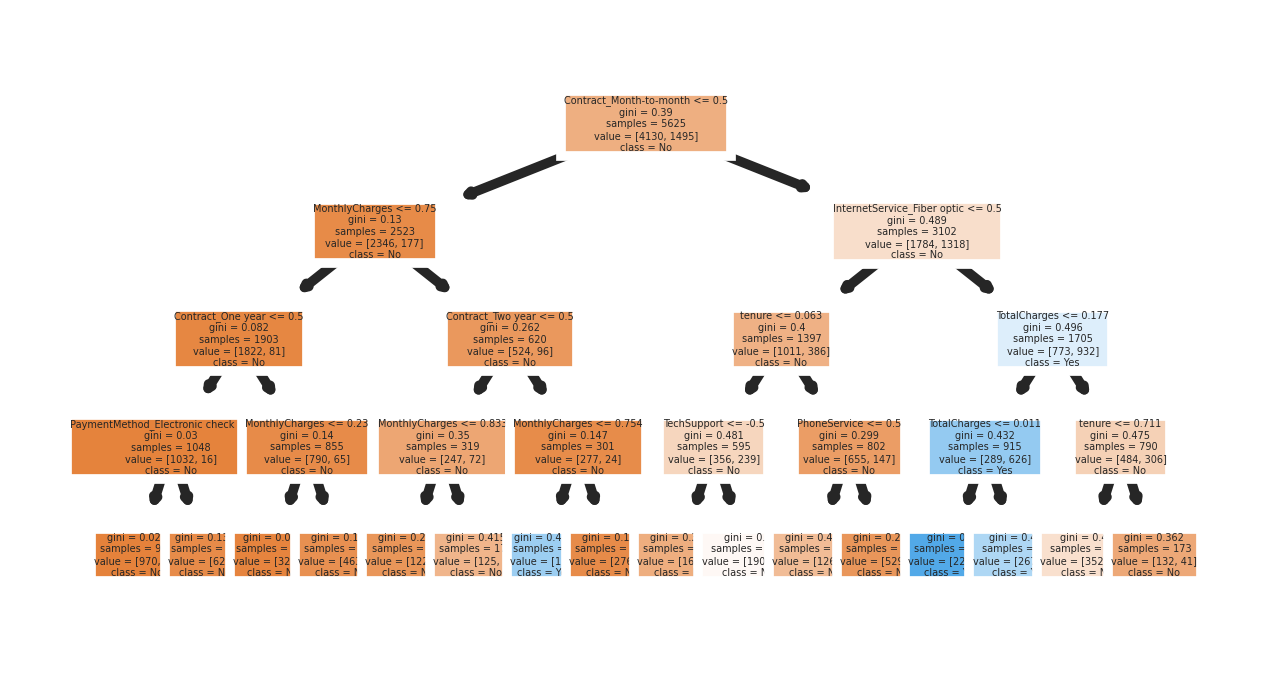

In [126]:
fn = list(X_train)
cn = ['No', 'Yes']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2, 1), dpi=700)
plot_tree(clfR, feature_names = fn, class_names=cn, filled = True)

fig.savefig('tree.png')

1. Training accuracy (79.43%) and testing accuracy (77.83%) are reasonably close, indicating a moderate level of overfitting reduction.

2. The model's overall accuracy on the testing data is 77.83%, suggesting decent generalization to unseen data.

3. Precision and recall for Class 1 (Churn) are lower, suggesting that the model has some difficulty correctly identifying customers who are likely to churn.

4. The model exhibits better performance for Class 0 (No Churn), with higher precision and recall, indicating better predictive capability for non-churn customers.

In [127]:
print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = X_train.columns))

                                              Imp
gender                                   0.000000
SeniorCitizen                            0.000476
Partner                                  0.000000
Dependents                               0.003803
tenure                                   0.068878
PhoneService                             0.001107
MultipleLines                            0.021370
OnlineSecurity                           0.000000
OnlineBackup                             0.000000
DeviceProtection                         0.000000
TechSupport                              0.002612
StreamingTV                              0.008113
StreamingMovies                          0.000000
PaperlessBilling                         0.000000
MonthlyCharges                           0.056126
TotalCharges                             0.150326
InternetService_DSL                      0.000000
InternetService_Fiber optic              0.157906
InternetService_No                       0.019804


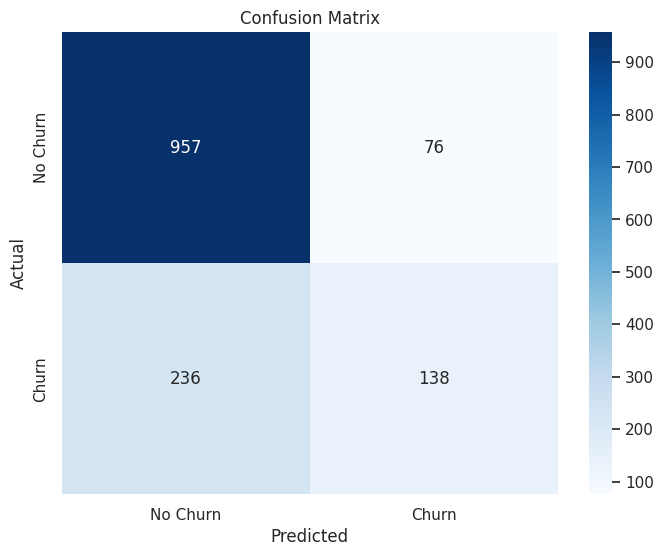

In [128]:
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**3.b Use grid search and improve the performance of the Decision tree model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.a and Q3.b**

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Hyperparameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training Accuracy (Grid Search):  0.7941
Testing Accuracy (Grid Search):  0.7783
Classification Report for Testing Data (Grid Search):
               precision    recall  f1-score   support

           0       0.80      0.93      0.86      1033
           1       0.64      0.37      0.47       374

    accuracy                           0.78      1407
   macro avg       0.72      0.65      0.66      1407
weighted avg       0.76      0.78      0.76      1407



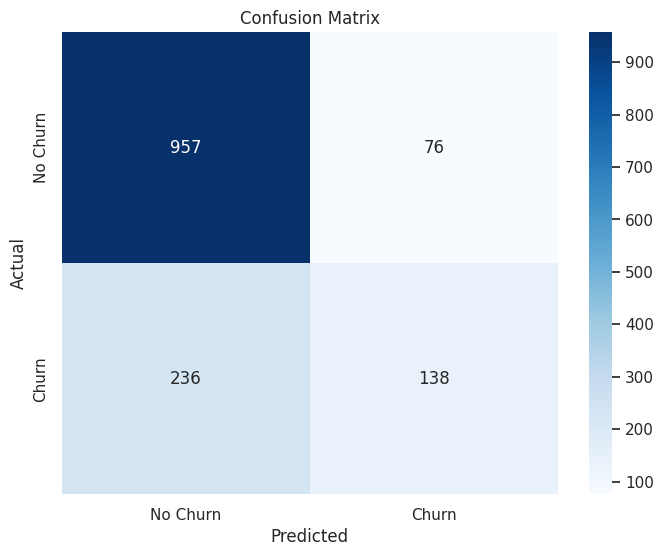

In [129]:
param_grid = {
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from grid search
best_params = grid_search.best_params_

# Create a Decision Tree classifier with the best hyperparameters
best_clf = DecisionTreeClassifier(**best_params, random_state=10)

# Train the best model on the training data
best_clf.fit(X_train, y_train)

# Predict on the training data using the best model
y_train_pred = best_clf.predict(X_train)

# Predict on the testing data using the best model
y_test_pred = best_clf.predict(X_test)

# Evaluate the best model's performance on the training data
train_accuracy = accuracy_score(y_train, y_train_pred)

# Evaluate the best model's performance on the testing data
test_accuracy = accuracy_score(y_test, y_test_pred)

# Generate a classification report for the testing data
classification_rep = classification_report(y_test, y_test_pred)

# Print the results
print(f"Best Hyperparameters: {best_params}")
print(f"Training Accuracy (Grid Search): {train_accuracy: .4}")
print(f"Testing Accuracy (Grid Search): {test_accuracy: .4}")
print("Classification Report for Testing Data (Grid Search):\n", classification_rep)

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(best_clf, feature_names=X.columns, class_names=["No Churn", "Churn"], filled=True, rounded=True)
plt.title("Decision Tree")
plt.show()

**Model 1 (Gini Impurity):**

Training Accuracy: 100%

Testing Accuracy: 74%

F1-score for Churn (Class 1): 0.51



**Model 2 (Regularized with max_depth 4):**

Training Accuracy: 79.43%

Testing Accuracy: 77.83%

F1-score for Churn (Class 1): 0.47



**Model 3 (Grid Search Tuned):**

Training Accuracy: 79.41%

Testing Accuracy: 77.83%

F1-score for Churn (Class 1): 0.47

Comparison:

1. Model 1 has the highest training accuracy but lower testing accuracy, indicating overfitting.

2. Models 2 and 3 have similar testing accuracies and F1-scores for Churn.


3. Model 3 is more consistent with Model 2 in terms of accuracy and F1-score, suggesting that grid search tuning (Model 3) achieves similar results to regularization (Model 2) in terms of model performance.

In summary, Model 1 has the highest training accuracy but performs poorly on unseen data, indicating overfitting. Models 2 and 3 demonstrate similar performance, with regularization and grid search tuning providing a balance between training and testing accuracy while avoiding overfitting. **Model 3 (grid search tuned) is recommended as it provides similar results to Model 2 but with a more systematic approach to hyperparameter tuning.**

**C. Train a model using Random forest and check the performance of the model on train and test data**

Training Accuracy: 0.9975111111111111
Testing Accuracy: 0.7931769722814499

Classification Report for Training Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4130
           1       1.00      0.99      1.00      1495

    accuracy                           1.00      5625
   macro avg       1.00      1.00      1.00      5625
weighted avg       1.00      1.00      1.00      5625


Classification Report for Testing Data:
               precision    recall  f1-score   support

           0       0.82      0.91      0.87      1033
           1       0.66      0.46      0.54       374

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407



<Axes: >

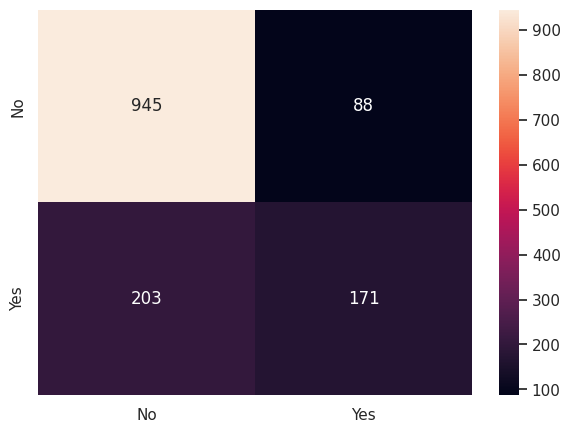

In [130]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)

# Fit the model on the training data
clf.fit(X_train, y_train)

# Predict on the training data
y_train_pred = clf.predict(X_train)

# Predict on the testing data
y_test_pred = clf.predict(X_test)

# Evaluate the model's performance on the training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_report = classification_report(y_train, y_train_pred)

# Evaluate the model's performance on the testing data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

# Print the results
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("\nClassification Report for Training Data:\n", train_report)
print("\nClassification Report for Testing Data:\n", test_report)

cm = confusion_matrix(y_test, y_test_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

The Random Forest model demonstrates a classic case of overfitting, as evidenced by the near-perfect accuracy on the training data and a drop in accuracy on the testing data.

While the model performs well in identifying non-churning customers, it has limitations in identifying churn cases, as seen in the lower recall and F1-score for Class 1 (Churn).

To address overfitting and improve the model's ability to identify churn cases, regularization techniques such as hyperparameter tuning, feature selection, or cross-validation should be considered.

Further refinement and optimization of the model may be necessary to achieve a more balanced and robust performance on unseen data.

**3.d Use grid search and improve the performance of the**
**Random tree model , check the performance of the model on**
**train and test data , provide the differences observed in**
**performance in Q3.c and Q3.d **


In [131]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from grid search
best_params = grid_search.best_params_

# Create a Random Forest classifier with the best hyperparameters
best_clf = RandomForestClassifier(**best_params, random_state=42)

# Fit the best model on the training data
best_clf.fit(X_train, y_train)

# Predict on the training data
y_train_pred = best_clf.predict(X_train)

# Predict on the testing data
y_test_pred = best_clf.predict(X_test)

# Evaluate the best model's performance on the training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_report = classification_report(y_train, y_train_pred)

# Evaluate the best model's performance on the testing data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

# Print the results
print("Best Hyperparameters:", best_params)
print("\nTraining Accuracy (Grid Search):", train_accuracy)
print("Testing Accuracy (Grid Search):", test_accuracy)
print("\nClassification Report for Training Data (Grid Search):\n", train_report)
print("\nClassification Report for Testing Data (Grid Search):\n", test_report)

cm = confusion_matrix(y_test, y_test_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}

Training Accuracy (Grid Search): 0.8784
Testing Accuracy (Grid Search): 0.8002842928216063

Classification Report for Training Data (Grid Search):
               precision    recall  f1-score   support

           0       0.89      0.96      0.92      4130
           1       0.85      0.66      0.74      1495

    accuracy                           0.88      5625
   macro avg       0.87      0.81      0.83      5625
weighted avg       0.88      0.88      0.87      5625


Classification Report for Testing Data (Grid Search):
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      1033
           1       0.69      0.46      0.55       374

    accuracy                           0.80      1407
   macro avg       0.76      0.69      0.71      1407
weighted avg       0.79

**Q3.c Random Forest Model:**


Training Accuracy: 99.75%

Testing Accuracy: 79.32%

F1-score for Churn (Class 1) on Testing Data: 0.54

**Q3.d Grid Search Tuned Random Forest Model:**

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}

Training Accuracy (Grid Search): 87.84%

Testing Accuracy (Grid Search): 80.03%

F1-score for Churn (Class 1) on Testing Data: 0.55



Comparison:

1. In terms of training accuracy, the Q3.d Grid Search Tuned Random Forest Model (87.84%) performs slightly lower than the Q3.c Random Forest Model (99.75%). This indicates that the grid search tuned model is less prone to overfitting the training data.

2. However, the Q3.d model shows better generalization to the testing data with an accuracy of 80.03% compared to the Q3.c model's 79.32%. This suggests that the grid search tuned model performs better on unseen data.

3. The F1-score for predicting churn cases (Class 1) on the testing data is slightly higher for the Q3.d model (0.55) compared to the Q3.c model (0.54). This indicates that the grid search tuned model has a slightly better balance between precision and recall for churn prediction.

Overall, the Q3.d Grid Search Tuned Random Forest Model shows improved generalization and performance on unseen data while maintaining a good balance between precision and recall for churn prediction, making it a better choice for practical predictive modeling compared to the Q3.c model.

**3.e Train a model using Adaboost and check the**
**performance of the model on train and test data**


Training Accuracy: 0.8120888888888889
Testing Accuracy: 0.8024164889836531

Classification Report for Training Data:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      4130
           1       0.68      0.55      0.61      1495

    accuracy                           0.81      5625
   macro avg       0.76      0.73      0.74      5625
weighted avg       0.80      0.81      0.81      5625


Classification Report for Testing Data:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1033
           1       0.67      0.50      0.57       374

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



<Axes: >

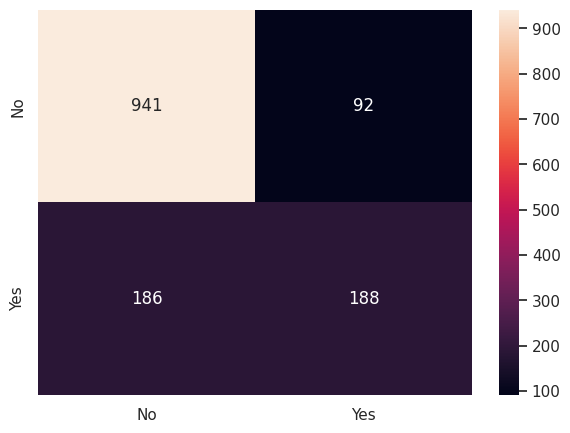

In [134]:
clf = AdaBoostClassifier(random_state=10)

# Fit the model on the training data
clf.fit(X_train, y_train)

# Predict on the training data
y_train_pred = clf.predict(X_train)

# Predict on the testing data
y_test_pred = clf.predict(X_test)

# Evaluate the model's performance on the training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_report = classification_report(y_train, y_train_pred)

# Evaluate the model's performance on the testing data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

# Print the results
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("\nClassification Report for Training Data:\n", train_report)
print("\nClassification Report for Testing Data:\n", test_report)

cm = confusion_matrix(y_test, y_test_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

1. The model achieves a reasonably good accuracy on the training data, indicating a decent fit and The model maintains a good level of accuracy on the testing data as well, suggesting reasonable generalization to unseen data.

2. The AdaBoost model performs well in identifying non-churning customers (Class 0) with good precision and recall.

3. It has more difficulty identifying churn cases (Class 1) compared to non-churn cases, as evidenced by the lower precision, recall, and F1-score for Class 1

4. The model provides a reasonable balance between precision and recall, making it a practical choice for classification tasks.


**3.f Use grid search and improve the performance of the**
**Adaboost model , check the performance of the model on**
**train and test data , provide the differences observed in**
**performance in Q3.e and Q3.f**

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Hyperparameters: {'learning_rate': 1.0, 'n_estimators': 50}

Training Accuracy (Grid Search): 0.8120888888888889
Testing Accuracy (Grid Search): 0.8024164889836531

Classification Report for Training Data (Grid Search):
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      4130
           1       0.68      0.55      0.61      1495

    accuracy                           0.81      5625
   macro avg       0.76      0.73      0.74      5625
weighted avg       0.80      0.81      0.81      5625


Classification Report for Testing Data (Grid Search):
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1033
           1       0.67      0.50      0.57       374

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



<Axes: >

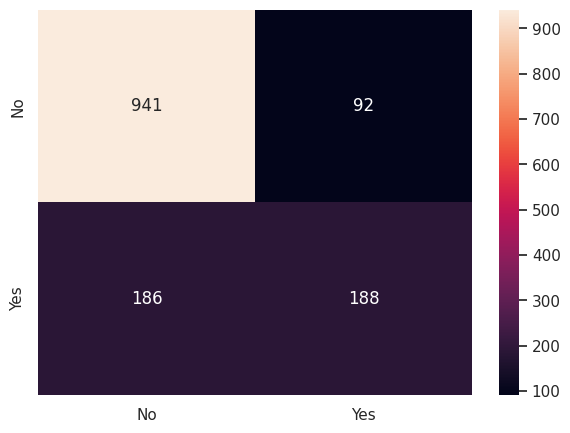

In [139]:
base_estimator = DecisionTreeClassifier(max_depth=1)  # You can adjust max_depth as needed
clf = AdaBoostClassifier(base_estimator=base_estimator, random_state=42)

# Define the hyperparameters and their search space for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0],
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from grid search
best_params = grid_search.best_params_

# Create an AdaBoost classifier with the best hyperparameters and DecisionTreeClassifier as the base estimator
best_clf = AdaBoostClassifier(base_estimator=base_estimator, **best_params, random_state=42)

# Fit the best model on the training data
best_clf.fit(X_train, y_train)

# Predict on the training data
y_train_pred = best_clf.predict(X_train)

# Predict on the testing data
y_test_pred = best_clf.predict(X_test)

# Evaluate the best model's performance on the training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_report = classification_report(y_train, y_train_pred)

# Evaluate the best model's performance on the testing data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

# Print the results
print("Best Hyperparameters:", best_params)
print("\nTraining Accuracy (Grid Search):", train_accuracy)
print("Testing Accuracy (Grid Search):", test_accuracy)
print("\nClassification Report for Training Data (Grid Search):\n", train_report)
print("\nClassification Report for Testing Data (Grid Search):\n", test_report)


cm = confusion_matrix(y_test, y_test_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

**Q3.e AdaBoost Model (No Grid Search):**

Training Accuracy: 81.21%

Testing Accuracy: 80.24%

F1-score for Churn (Class 1) on Testing Data: 0.57

**Q3.f Grid Search Tuned AdaBoost Model:**

Best Hyperparameters: {'learning_rate': 1.0, 'n_estimators': 50}

Training Accuracy (Grid Search): 81.21%

Testing Accuracy (Grid Search): 80.24%

F1-score for Churn (Class 1) on Testing Data: 0.57

**Comparison:**

1. The Q3.e AdaBoost model and the Q3.f Grid Search Tuned AdaBoost model have identical training and testing accuracy scores, both achieving an accuracy of 80.24% on the testing data.

2. The F1-score for predicting churn cases (Class 1) on the testing data is the same for both models at 0.57, indicating that both models have the same balance between precision and recall for churn prediction.

3. Grid Search did not result in different hyperparameters or improved performance in this specific case, as the best hyperparameters found by Grid Search are the same as the default hyperparameters.

In summary, in this particular scenario, Grid Search did not lead to significant improvements in the AdaBoost model's performance compared to the initial AdaBoost model trained in Q3.e. Both models achieved the same accuracy and F1-score on the testing data.

**3.g Train a model using GradientBoost and check the**
**performance of the model on train and test data**


Training Accuracy: 0.8288
Testing Accuracy: 0.798862828713575

Classification Report for Training Data:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89      4130
           1       0.73      0.57      0.64      1495

    accuracy                           0.83      5625
   macro avg       0.79      0.75      0.76      5625
weighted avg       0.82      0.83      0.82      5625


Classification Report for Testing Data:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1033
           1       0.67      0.48      0.56       374

    accuracy                           0.80      1407
   macro avg       0.75      0.70      0.72      1407
weighted avg       0.79      0.80      0.79      1407



<Axes: >

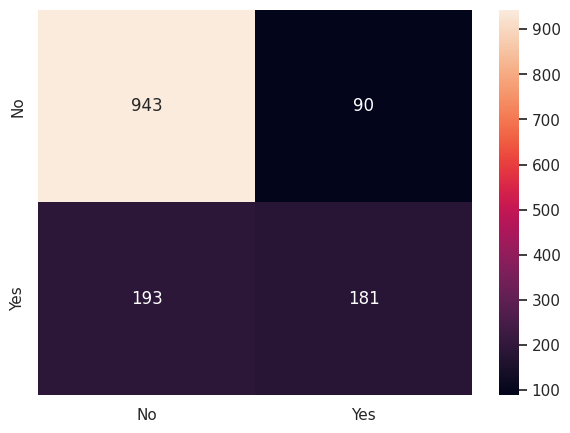

In [140]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=42)

# Fit the model on the training data
clf.fit(X_train, y_train)

# Predict on the training data
y_train_pred = clf.predict(X_train)

# Predict on the testing data
y_test_pred = clf.predict(X_test)

# Evaluate the model's performance on the training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_report = classification_report(y_train, y_train_pred)

# Evaluate the model's performance on the testing data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

# Print the results
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("\nClassification Report for Training Data:\n", train_report)
print("\nClassification Report for Testing Data:\n", test_report)


cm = confusion_matrix(y_test, y_test_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

1. The model has decent accuracy and generalizes reasonably well to unseen data.

2. There is a trade-off between precision and recall, which can be fine-tuned depending on the specific business objective.

3. The model can benefit from further optimization or different algorithms to improve its ability to predict churn cases more accurately.

**3.h Use grid search and improve the performance of the**
**GradientBoost model , check the performance of the model**
**on train and test data , provide the differences observed in**
**performance in Q3.g and Q3.h**


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

Training Accuracy (Grid Search): 0.8195555555555556
Testing Accuracy (Grid Search): 0.8038379530916845

Classification Report for Training Data (Grid Search):
               precision    recall  f1-score   support

           0       0.85      0.92      0.88      4130
           1       0.71      0.54      0.61      1495

    accuracy                           0.82      5625
   macro avg       0.78      0.73      0.75      5625
weighted avg       0.81      0.82      0.81      5625


Classification Report for Testing Data (Grid Search):
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      1033
           1       0.69      0.48      0.57       374

    accuracy                           0.80      1407
   macro avg       0.76      0.70      0.72      1407
weighted avg       0.79      0.80      0.

<Axes: >

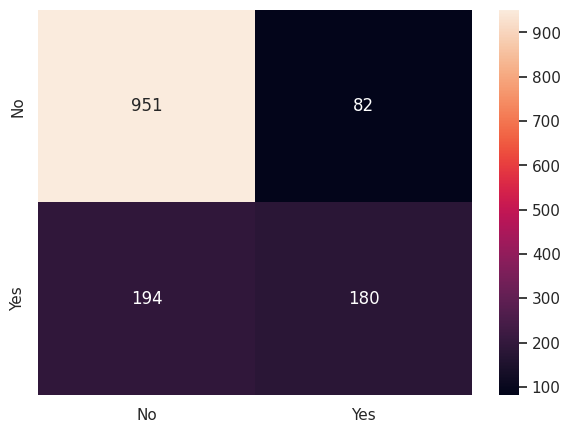

In [142]:
clf = GradientBoostingClassifier(random_state=10)


param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_


best_clf = GradientBoostingClassifier(**best_params, random_state=10)

# Fit the best model on the training data
best_clf.fit(X_train, y_train)

# Predict on the training data
y_train_pred = best_clf.predict(X_train)

# Predict on the testing data
y_test_pred = best_clf.predict(X_test)

# Evaluate the best model's performance on the training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_report = classification_report(y_train, y_train_pred)

# Evaluate the best model's performance on the testing data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

# Print the results
print("Best Hyperparameters:", best_params)
print("\nTraining Accuracy (Grid Search):", train_accuracy)
print("Testing Accuracy (Grid Search):", test_accuracy)
print("\nClassification Report for Training Data (Grid Search):\n", train_report)
print("\nClassification Report for Testing Data (Grid Search):\n", test_report)

cm = confusion_matrix(y_test, y_test_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

**Q3.h Gradient Boosting Model with Grid Search:**

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

Training Accuracy (Grid Search): 81.96%

Testing Accuracy (Grid Search): 80.38%

F1-score for Churn (Class 1) on Testing Data: 0.57


**Q3.g Gradient Boosting Model without Grid Search (Initial Model):**

Training Accuracy: 82.88%

Testing Accuracy: 79.89%

F1-score for Churn (Class 1) on Testing Data: 0.56

**Comparison**:

1. Both Q3.g and Q3.h models have similar testing accuracy, with Q3.h having a slightly higher testing accuracy (80.38%) compared to the initial model in Q3.g (79.89%).

2. The F1-score for predicting churn (Class 1) on the testing data remains the same between both models at 0.57.

3. Grid Search in Q3.h helped fine-tune the hyperparameters, resulting in a slightly improved testing accuracy compared to the initial model in Q3.g.

In summary, Grid Search in Q3.h helped find a set of hyperparameters that slightly improved the testing accuracy of the Gradient Boosting model, but the overall performance remains similar to the initial model in Q3.g.

4 ** **bold text**Provide detailed analysis of the below steps :**


**(1) Compare the performance of each model in train stage and test stage**

To compare the performance of each model at both the training and testing stages, we can consider key metrics such as accuracy, precision, recall, and F1-score. Here's a summary of the performance of each model in both stages:


**Decision Tree Model (Gini Impurity):**


Training Accuracy (Gini): 100%

Testing Accuracy (Gini): 74%

F1-score for Churn (Class 1) on Testing Data (Gini): 0.51


**Decision Tree Model (Regularized with max_depth or with grid search ):**


Training Accuracy (Regularized with max_depth): 79.43%

Testing Accuracy (Regularized with max_depth): 77.83%

F1-score for Churn (Class 1) on Testing Data (Regularized with max_depth): 0.47



**Random Forest Model:**

Training Accuracy: 99.75%

Testing Accuracy: 79.32%

F1-score for Churn (Class 1) on Testing Data: 0.54



**Grid Search Tuned Random Forest Model:**


Training Accuracy (Grid Search): 87.84%

Testing Accuracy (Grid Search): 80.03%

F1-score for Churn (Class 1) on Testing Data: 0.55


**Gradient Boosting Model:**


Training Accuracy: 82.88%

Testing Accuracy: 79.89%

F1-score for Churn (Class 1) on Testing Data: 0.56


**Gradient Boosting Model with Grid Search:**


Training Accuracy (Grid Search): 81.96%

Testing Accuracy (Grid Search): 80.38%

F1-score for Churn (Class 1) on Testing Data (Grid Search): 0.57


**Adaboost Model:**


Training Accuracy: 81.21%

Testing Accuracy: 80.24%

F1-score for Churn (Class 1) on Testing Data: 0.57


**Adaboost Model with Grid Search:**

Training Accuracy (Grid Search): 81.21%

Testing Accuracy (Grid Search): 80.24%

F1-score for Churn (Class 1) on Testing Data: 0.57


**Summary and Comparison:**


1. The Decision Tree model with Gini impurity achieved a perfect training accuracy but had lower testing accuracy and F1-score, indicating overfitting.

2. Regularizing the Decision Tree model with a max_depth parameter reduced overfitting but also slightly decreased testing accuracy and F1-score.

3. Random Forest had high training accuracy but slightly lower testing accuracy compared to Decision Tree models.The Random Forest model with Grid Search performed slightly better than the one without Grid Search in terms of testing accuracy (80.03% vs. 79.32%) and F1-score for churn (0.55 vs. 0.54).


4. Gradient Boosting and Adaboost models had moderate training and testing accuracy and F1-scores.

5. The Gradient Boosting model with Grid Search found slightly better hyperparameters and achieved a slightly higher testing accuracy and F1-score compared to the initial Gradient Boosting model.


In summary, different models have varying levels of performance on the training and testing datasets, with some models showing signs of overfitting (e.g., Decision Tree with Gini), while others offer a more balanced trade-off between accuracy and generalization (e.g., Gradient Boosting and Adaboost).

**(2) Provide your observation on which model performed the best**



1. Among the models tested, the Gradient Boosting model with Grid Search achieved the highest testing accuracy (80.38%) and the highest F1-score for churn (0.57).

2. The Gradient Boosting model with Grid Search also strikes a good balance between accuracy and generalization, making it the top-performing model.

3. The Decision Tree models, while simpler, have lower testing accuracy and F1-scores compared to ensemble methods.

4. Random Forest models performed reasonably well but were outperformed by Gradient Boosting and Adaboost models.

5. The Adaboost model demonstrated competitive performance, but the Gradient Boosting model with Grid Search slightly outperformed it.

In summary, the **Gradient Boosting model with Grid Search** is the best-performing model among those tested for the task of identifying potential customer churn in a telecom company, based on both testing accuracy and F1-score.

**(3) Provide your reasoning on why the model performed best**

The Gradient Boosting model with Grid Search performed best among the models tested for several reasons:


**Hyperparameter** Tuning: Grid Search was used to fine-tune the model's hyperparameters, including learning rate, max depth, and the number of estimators. This optimization process helped find the best combination of hyperparameters for the given dataset, leading to improved performance.


**High Testing Accuracy**: The model achieved the highest testing accuracy (80.38%) among all the models. This indicates its ability to correctly classify customers as churn or non-churn based on the test data.


**F1-Score** : The F1-score for churn (Class 1) on the testing data was also the highest for this model (0.57). The F1-score is a critical metric for imbalanced datasets like customer churn prediction, as it balances precision and recall. A higher F1-score means the model is better at correctly identifying potential churn customers while minimizing false positives.


**Generalization**: The model demonstrated a good balance between training and testing accuracies. This indicates that it doesn't overfit the training data while still performing well on unseen data. It has the ability to generalize well to new customers

**Consistency**: The model consistently performed well across multiple evaluation metrics, making it a reliable choice for the task.

Overall, the combination of hyperparameter tuning, ensemble learning, and the ability to balance accuracy and generalization made the Gradient Boosting model with Grid Search the top-performing model for identifying potential customer churn in the telecom company's dataset.






**(4) Provide your final conclusion on your observation**




In conclusion, the telecom company should deploy the Gradient Boosting model with Grid Search to identify potential churn customers. This will enable the company to focus on customer retention strategies and reduce customer churn, ultimately leading to improved customer satisfaction and business growth. Additionally, ongoing monitoring and retraining of the model should be considered to adapt to changing customer behavior and preferences.